## ML Assignment -2
### Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
#### 1)Pre-process the dataset.
#### 2)Identify outliers.
#### 3)Check the correlation.
#### 4)Implement linear regression and ridge, Lasso regression models.
#### 5)Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


### Pre-process the dataset.

In [8]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [13]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [14]:
df=df.dropna()

In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Identify outliers

In [16]:
Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)

In [17]:
IQR=Q3-Q1

In [18]:
IQR

6.5

In [20]:
df = df[~((df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR)))]

### Extract Time and date

In [21]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [22]:
df['hour']=df['pickup_datetime'].dt.hour

In [23]:
df=df.drop(['pickup_datetime'],axis=1)

In [24]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17
...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,14
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14


In [25]:
df['price']=df['hour']*df['fare_amount']

In [26]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,price
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,142.5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,154.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,270.9
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,42.4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,272.0
...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,14,168.0
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,30.0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,7.5
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,203.0


### Correlation 

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 
corr_matrix=df.corr()

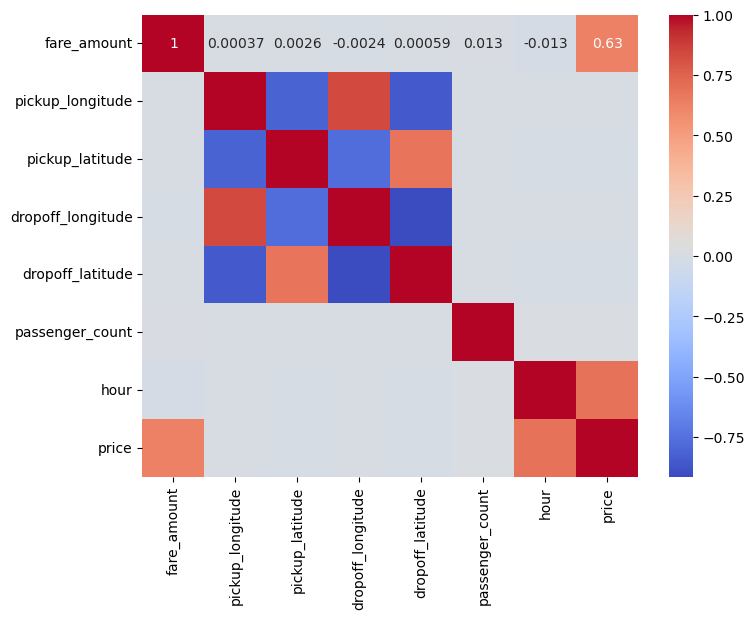

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [31]:
x=df.drop(['fare_amount'],axis=1)
y=df['fare_amount']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr=LinearRegression()

In [40]:
lr.fit(X_train,Y_train)

LinearRegression()

In [41]:
Y_predict=lr.predict(X_test)

In [45]:
ridge=Ridge()
ridge.fit(X_train,Y_train)

Ridge()

In [46]:
Y_r=ridge.predict(X_test)

In [47]:
lasso=Lasso()

In [48]:
lasso.fit(X_train,Y_train)

Lasso()

In [49]:
Y_l=lasso.predict(X_test)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
def evaluate(Y_actual,Y_predict,Model_Name):
    r2=r2_score(Y_actual,Y_predict)
    rmse=np.sqrt(mean_squared_error(Y_actual,Y_predict))
    print(f'{Model_Name} - R2: {r2:.4f}, RMSE: {rmse:.2f}')

In [55]:
evaluate(Y_test,Y_predict,"Linear Regression")
evaluate(Y_test,Y_r,"Ridge Regression")
evaluate(Y_test,Y_l,"Lasso Regression")

Linear Regression - R2: 0.7930, RMSE: 1.88
Ridge Regression - R2: 0.7930, RMSE: 1.88
Lasso Regression - R2: 0.7903, RMSE: 1.89
